[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/fuyu256s/snippets-nouns/blob/main/gen_nouns_sushi.ipynb)

# setup

## import

In [ ]:
!git clone https://github.com/nounsDAO/nouns-monorepo.git

Cloning into 'nouns-monorepo'...
remote: Enumerating objects: 31341, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 31341 (delta 32), reused 37 (delta 20), pack-reused 31278
Receiving objects: 100% (31341/31341), 10.23 MiB | 7.41 MiB/s, done.
Resolving deltas: 100% (23235/23235), done.


In [ ]:
!git clone https://github.com/Cryptocoders-wtf/sushi-nouns-dao-assets.git

Cloning into 'sushi-nouns-dao-assets'...
remote: Enumerating objects: 217, done.
remote: Counting objects: 100% (217/217), done.
remote: Compressing objects: 100% (147/147), done.
remote: Total 217 (delta 71), reused 193 (delta 58), pack-reused 0
Receiving objects: 100% (217/217), 483.73 KiB | 1.21 MiB/s, done.
Resolving deltas: 100% (71/71), done.


In [ ]:
%ls

nouns-monorepo/  sample_data/  sushi-nouns-dao-assets/


In [ ]:
import math
import random
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

In [ ]:
seed = None
random.seed(seed)

## func

In [ ]:
def im_stack(parts: list) -> Image.Image:
    for i, x in enumerate(parts):
        if i == 0:
            im = Image.open(x)
        else:
            _x = Image.open(x)
            im.paste(_x, mask=_x)
    return im

In [ ]:
def plt_ims_auto(ims: list, ncols: int = 5):
    nrows = math.ceil(len(ims) / ncols)
    figsize = (ncols * 2, nrows * 2)
    plt_ims(ims, nrows=nrows, ncols=ncols, figsize=figsize)


def plt_ims(ims: list,
            nrows=4, ncols=5, figsize=(10, 8)):
  fig, axs = plt.subplots(nrows, ncols, figsize=figsize,
                          subplot_kw={'xticks': [], 'yticks': []})

  for ax in axs.flat:
    ax.axis('off')

  for ax, im in zip(axs.flat, ims):
      ax.imshow(im)

  fig.tight_layout()
  plt.show()

In [ ]:
def table_traits(p_traits):
    df = pd.DataFrame([[y.stem for y in x] for x in p_traits],
            columns=['0-backgrounds', '1-bodies', '2-accessories', '3-heads', '4-glasses'] )
    display(df.replace("^.*?-", "", regex=True))

## traits

In [ ]:
# nouns-assets
p0 = Path(r'./nouns-monorepo/packages/nouns-assets/images')

dir_traits0 = sorted([x for x in p0.iterdir() if x.is_dir()])
traits0 = [list(x.glob("*.png")) for x in dir_traits0]

print([x.name for x in dir_traits0])
print([len(x) for x in traits0])

['0-backgrounds', '1-bodies', '2-accessories', '3-heads', '4-glasses']
[2, 30, 137, 234, 21]


In [ ]:
# sushi-nouns-dao-assets
p1 = Path(r'./sushi-nouns-dao-assets/images')

dir_traits1 = sorted([x for x in p1.iterdir() if x.is_dir()])
traits1 = [list(x.glob("*.png")) for x in dir_traits1]

print([x.name for x in dir_traits1[:5]])
print([len(x) for x in traits1])

['0-backgrounds', '1-bodies', '2-accessories', '3-heads', '4-glasses']
[13, 0, 25, 19, 0, 1]


In [ ]:
# use these
traits = traits0.copy()
traits[0] = traits1[0]
traits[2] = traits1[2]
traits[3] = traits1[3]

print([len(x) for x in traits])

[13, 30, 25, 19, 21]


# generate

## 1 noun

['bg-uroko', 'body-darkpink', 'accessory-nihon-logo', 'head-medium-fatty-tuna', 'glasses-square-watermelon']


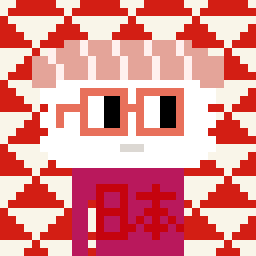

In [ ]:
# # specify:
# parts = [dir_traits1[0] / 'bg-warm.png',
#          dir_traits1[1] / 'body-grayscale-1.png',
#          dir_traits1[2] / 'accessory-1n.png',
#          dir_traits1[3] / 'head-film-35mm.png',
#          dir_traits1[4] / 'glasses-square-red.png'
#          ]

# random:
parts = [random.choice(x) for x in traits]
noun = im_stack(parts)

print([x.stem for x in parts])
# noun
# noun.save("out.png")
noun.resize((256, 256), Image.NEAREST)

## n nouns

In [ ]:
n = 20

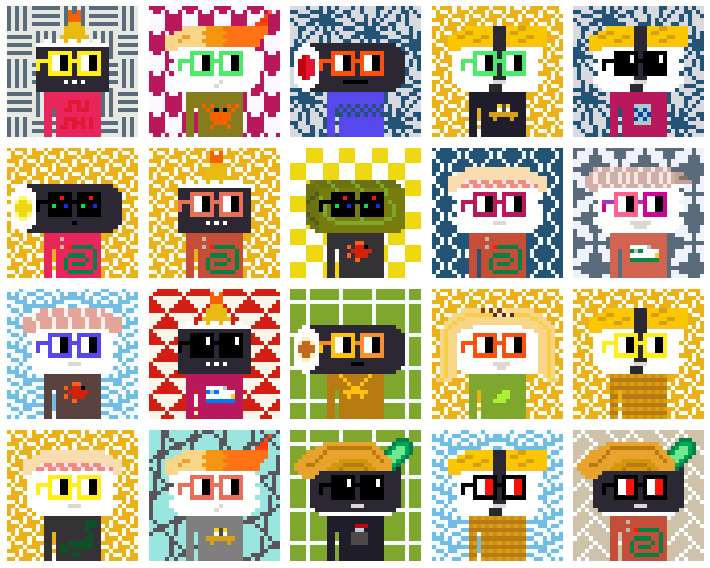

In [ ]:
p_traits = [[random.choice(x) for x in traits]
            for i in range(n)]
ims = [im_stack(x) for x in p_traits]

plt_ims_auto(ims)

In [ ]:
table_traits(p_traits)

,0-backgrounds,1-bodies,2-accessories,3-heads,4-glasses
0,sankuzushi,redpinkish,txt-sushi,shrimp-tempura,square-yellow-saturated
1,yagasuri,gunk,crab,aoyagi,square-teal
2,asanoha,computerblue,retorosushi-checker,tekka-maki,square-orange
3,fundou,grayscale-9,geta,tamago-v3,square-teal
4,asanoha,darkpink,yunomi,tamago-v3,square-fullblack
5,fundou,redpinkish,katori-sennkou,takuan-maki,square-black-rgb
6,fundou,rust,katori-sennkou,shrimp-tempura,square-watermelon
7,ichimatsu,grayscale-8,goldfish,kakinoha,square-black-rgb
8,tatewaku,rust,katori-sennkou,sea-​​bream,square-magenta
9,shippou,peachy-B,shinkansen200,shako,square-pink-purple-multi


## for each head

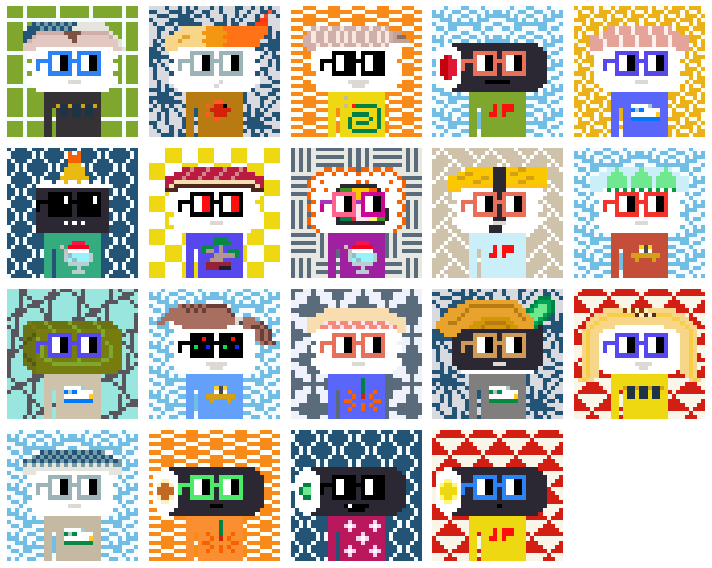

In [ ]:
n = len(traits[3])
p_traits_head = [[
                random.choice(traits[0]),
                random.choice(traits[1]),
                random.choice(traits[2]),
                traits[3][i],
                random.choice(traits[4]),
                 ]
            for i in range(n)]
ims_head = [im_stack(x) for x in p_traits_head]

plt_ims_auto(ims_head)

In [ ]:
table_traits(p_traits_head)

,0-backgrounds,1-bodies,2-accessories,3-heads,4-glasses
0,koushi,grayscale-8,goodwill,shime-mackerel,square-blue-med-saturated
1,asanoha,gold,goldfish,aoyagi,square-grey-light
2,hishi,yellow,katori-sennkou,shako,square-black
3,seigaiha,slimegreen,txt-jp,tekka-maki,square-watermelon
4,fundou,purple,shinkansen,medium-fatty-tuna,square-blue
5,tatewaku,teal,kakigoori,shrimp-tempura,square-fullblack
6,ichimatsu,computerblue,bonsai,skipjack,square-black-eyes-red
7,sankuzushi,magenta,kakigoori,california-roll,square-pink-purple-multi
8,higaki,cold,txt-jp,tamago-v3,square-watermelon
9,seigaiha,rust,geta,squid,square-red


## for each bg

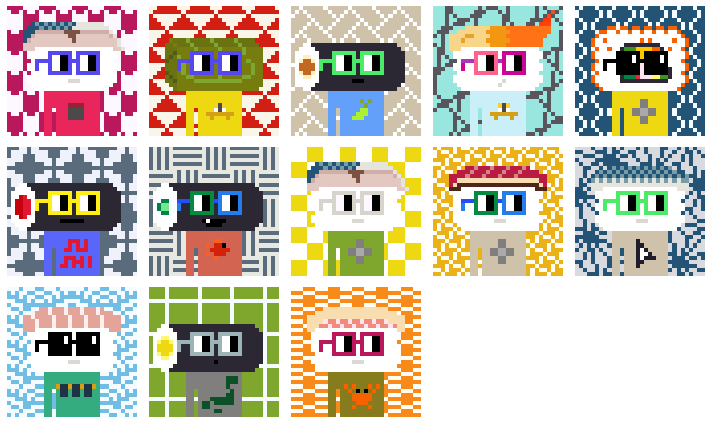

In [ ]:
n = len(traits[0])
p_traits_bg = [[
                traits[0][i],
                random.choice(traits[1]),
                random.choice(traits[2]),
                random.choice(traits[3]),
                random.choice(traits[4]),
                ]
                for i in range(n)]
ims_bg = [im_stack(x) for x in p_traits_bg]

plt_ims_auto(ims_bg)

In [ ]:
table_traits(p_traits_bg)

,0-backgrounds,1-bodies,2-accessories,3-heads,4-glasses
0,yagasuri,redpinkish,gari-box,shime-mackerel,square-blue
1,uroko,yellow,geta,kakinoha,square-blue
2,higaki,blue-sky,wasabi,kanpyou-maki,square-teal
3,kagome,cold,geta,aoyagi,square-pink-purple-multi
4,tatewaku,yellow,Dpad,california-roll,square-fullblack
5,shippou,purple,txt-sushi,tekka-maki,square-yellow-saturated
6,sankuzushi,peachy-B,goldfish,kappa-maki,square-green-blue-multi
7,ichimatsu,slimegreen,Dpad,shime-mackerel,square-smoke
8,fundou,bege-crt,Dpad,skipjack,square-green-blue-multi
9,asanoha,foggrey,pointer,kohada,square-teal


### replace bg-color

#### setup

In [ ]:
import json
from functools import partial

import numpy as np

In [ ]:
def repl_clr(im, bgcolors):
    getc = im.getcolors()

    # ITU-R 601-2 luma transform
    L = [R * 299/1000 + G * 587/1000 + B * 114/1000
        for R, G, B, A in (getc[0][1], getc[1][1])]
    i = 0 if L[0] >= L[1] else 1
    c0 = np.array(getc[i][1])

    arr = np.array(im)
    _c0 = np.array(ccode2rgb(bgcolors[0]) + [255], dtype=arr.dtype)
    _c1 = np.array(ccode2rgb(bgcolors[1]) + [255], dtype=arr.dtype)
    arr = np.where(arr == c0, _c0, _c1)

    return Image.fromarray(arr)


def ccode2rgb(c: str) -> tuple:
    c = c.replace("#", "")
    return [int(c[:2], 16), int(c[2:4], 16), int(c[4:6], 16)]


def im_stack2(parts: list, func) -> Image.Image:
    for i, x in enumerate(parts):
        if i == 0:
            im = Image.open(x)
            im = func(im)
        else:
            _x = Image.open(x)
            im.paste(_x, mask=_x)
    return im

#### generate

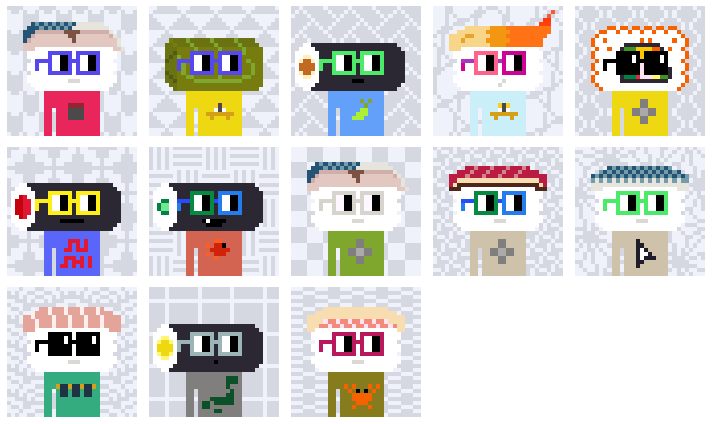

In [ ]:
bgcolors = ["#eff2fa", "#d5d7e1"]  # d5d7e1: bg-cool

ims_bg2 = [im_stack2(x, partial(repl_clr, bgcolors=bgcolors))
        for x in p_traits_bg]
plt_ims_auto(ims_bg2)

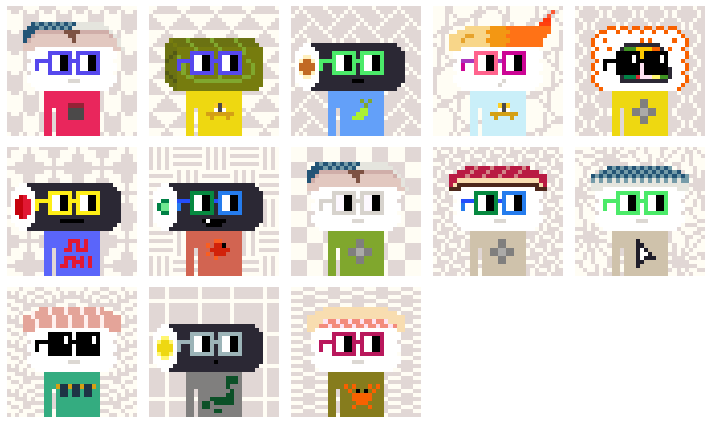

In [ ]:
bgcolors = ["#fffdf4", "#e1d7d5"]  # e1d7d5: bg-warm

ims_bg2 = [im_stack2(x, partial(repl_clr, bgcolors=bgcolors))
        for x in p_traits_bg]
plt_ims_auto(ims_bg2)

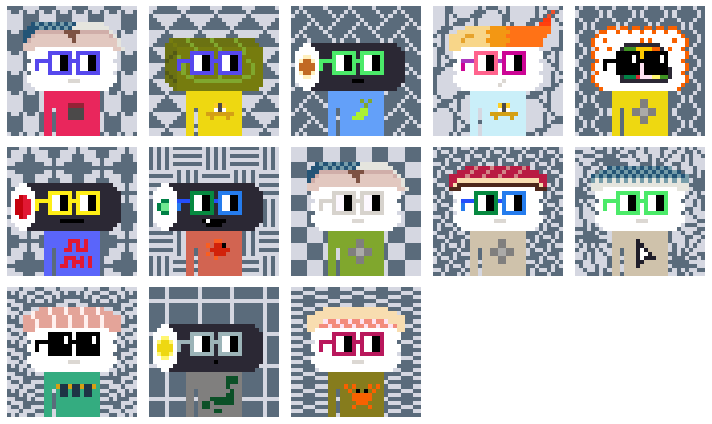

In [ ]:
bgcolors = ["#d5d7e1", "#5a6b7b"]

ims_bg2 = [im_stack2(x, partial(repl_clr, bgcolors=bgcolors))
        for x in p_traits_bg]
plt_ims_auto(ims_bg2)

#### random

In [ ]:
_p = Path(r'./nouns-monorepo/packages/nouns-assets/src/image-data.json')
with open(_p) as f:
    data = json.load(f)

data['palette'].remove("")
palette = data['bgcolors'] + data['palette']

['d18687', '235476']


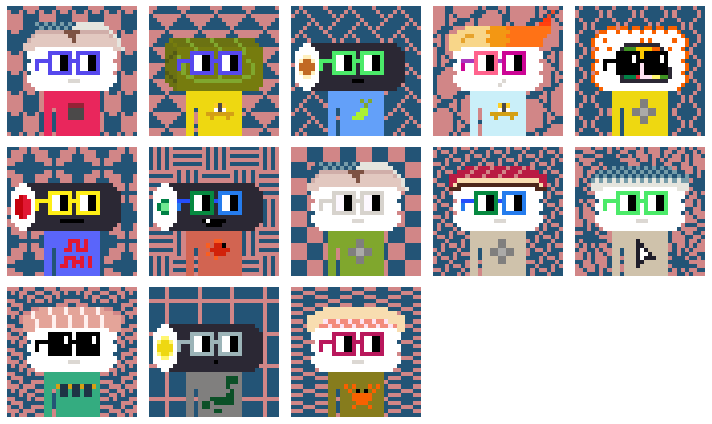

In [ ]:
bgcolors = random.choices(palette, k=2)
print(bgcolors)

ims_bg2 = [im_stack2(x, partial(repl_clr, bgcolors=bgcolors))
        for x in p_traits_bg]
plt_ims_auto(ims_bg2)